In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
cancer['feature_names']
# 30 labels -> binary

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
df_feat.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [25]:
x = df_feat
y = cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [26]:
model = SVC()
model.fit(x_train, y_train)
predicted_result = model.predict(x_test)

print(confusion_matrix(y_test, predicted_result))
#     0    1
#  0
#  1
# 100 pos 1 nega

[[43  3]
 [ 1 67]]


In [27]:
print(classification_report(y_test, predicted_result))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        68

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
# PCA
pca = PCA(n_components=2)
pca.fit(df_feat)
# 10000000 x 3 = 10000000 * 10000000 * 3
# 10000 x 100 = 10000 * 10000 * 100
xx = pca.transform(df_feat)
xx

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.2, random_state=666)
model = SVC()
model.fit(x_train, y_train)
predicted_result = model.predict(x_test)
print(confusion_matrix(y_test, predicted_result))
print(classification_report(y_test, predicted_result))

[[43  3]
 [ 2 66]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.96      0.97      0.96        68

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [
    {
        'kernel': ['rbf', 'linear'],
        'gamma': [1e-3, 1e-4, 1e-5],
        'C': [1, 10, 100, 1000]
    },
    # {
    #     'kernel': ['linear'],
    #     'gamma': [1e-3, 1e-4, 1e-5],
    #     'C': [1, 10, 100, 1000]
    # }
]
scores = ['prediction', 'recall']
svc = SVC()
grid_search = GridSearchCV(svc, tuned_parameters, n_jobs=-1, verbose=2)
grid_search.fit(xx, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05],
                          'kernel': ['rbf', 'linear']}],
             verbose=2)

In [36]:
grid_search.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [37]:
grid_search.best_score_

0.927930445582984

<AxesSubplot:>

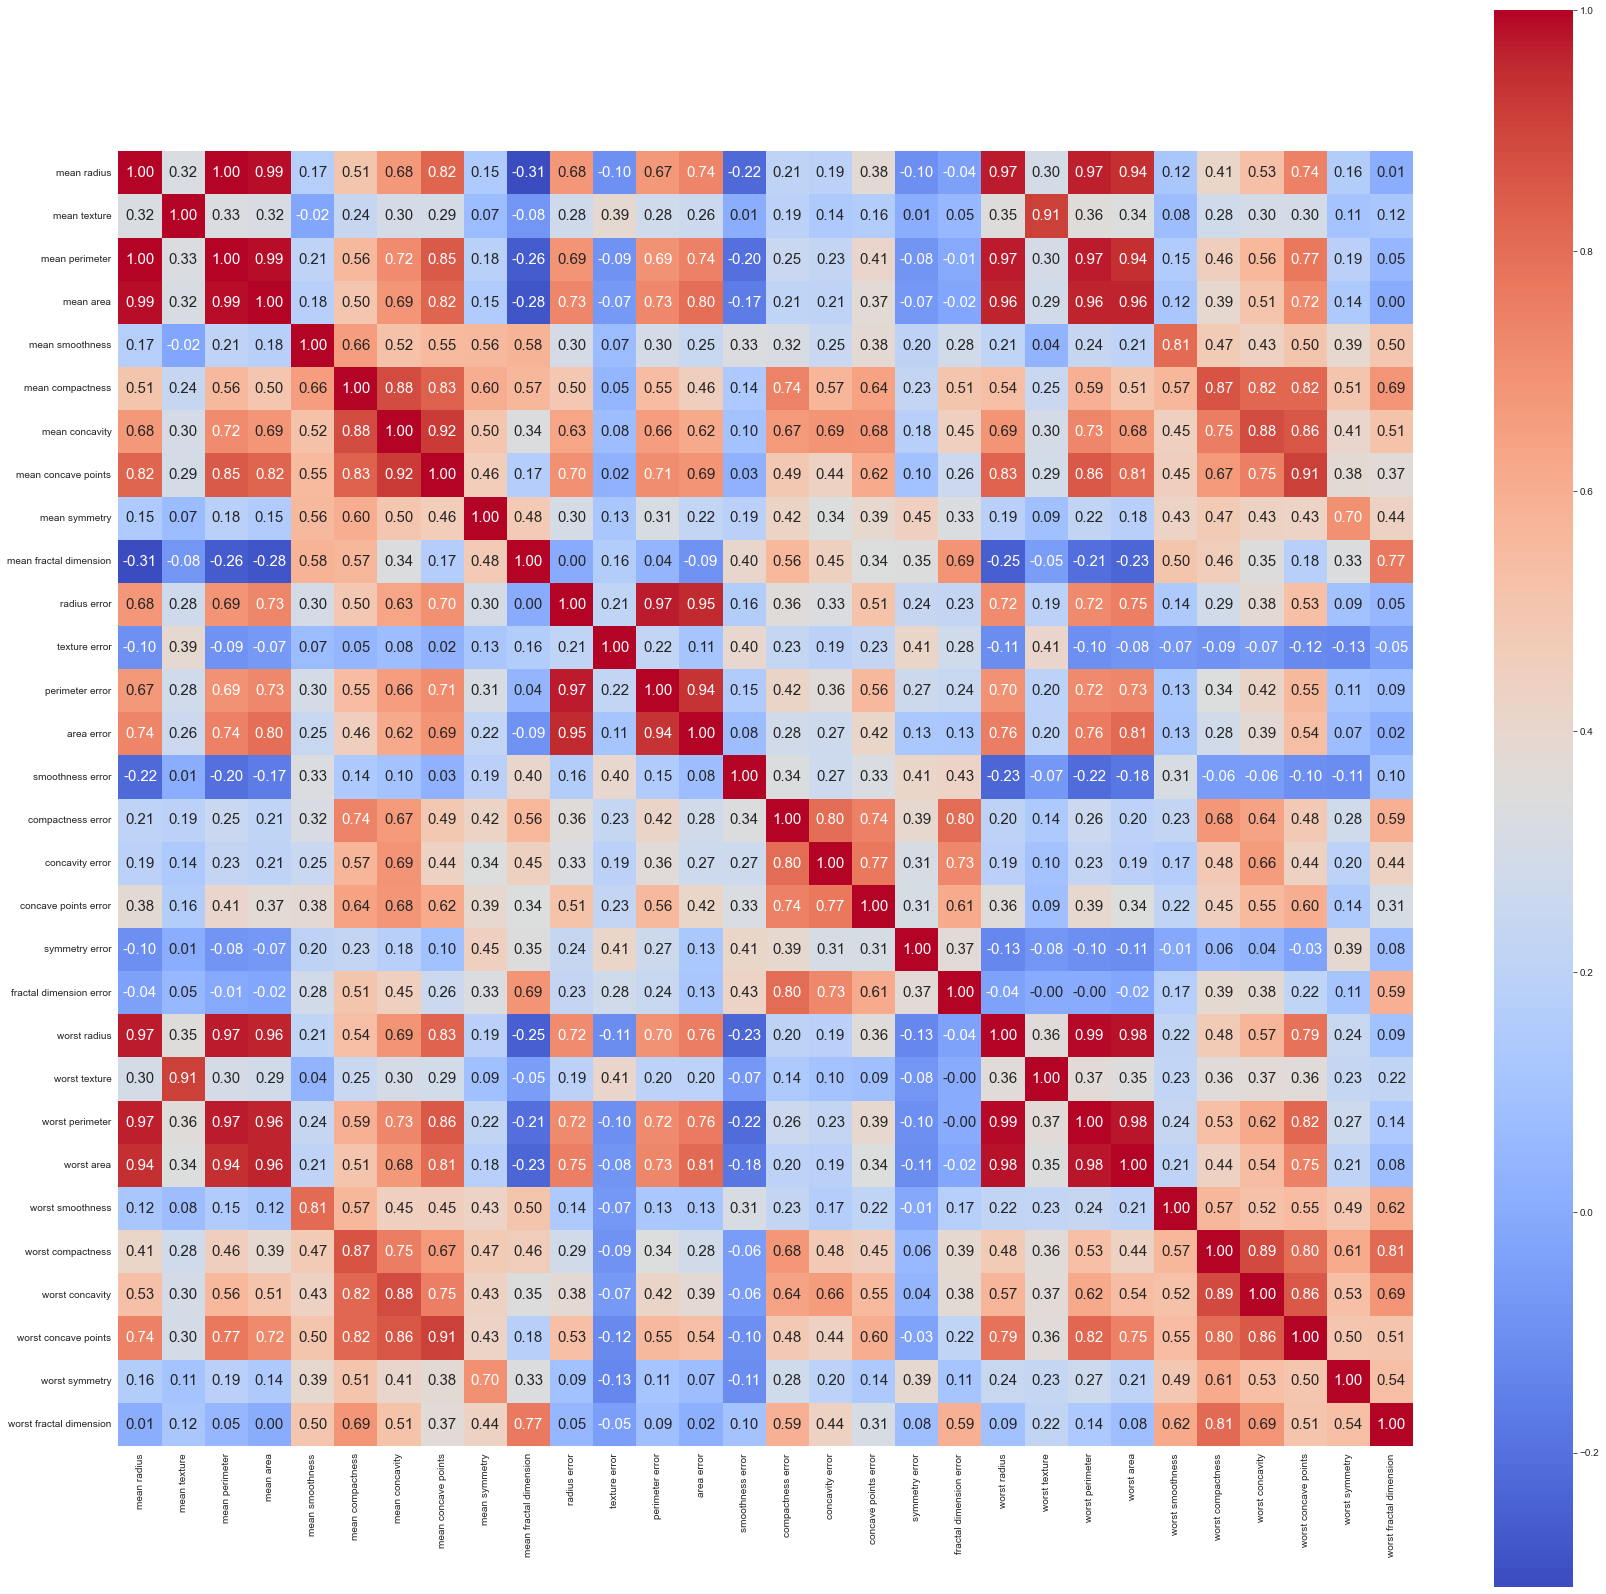

In [39]:
corr = df_feat.corr()
plt.figure(figsize=(29,29))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':15},
            xticklabels=cancer['feature_names'],
            yticklabels=cancer['feature_names'], cmap='coolwarm')

<AxesSubplot:>

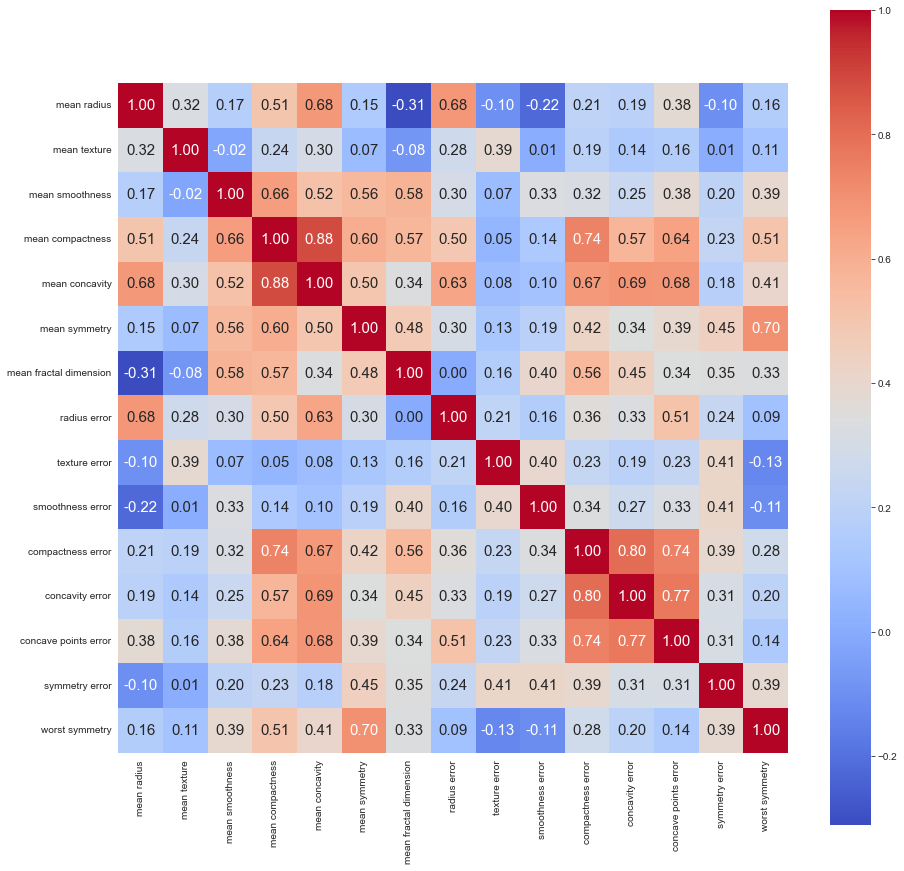

In [42]:
df_new = df_feat.drop(['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'worst texture', 'mean concave points', 'perimeter error', 'area error', 'fractal dimension error', 'worst concavity', 'worst concave points', 'worst fractal dimension', 'worst smoothness', 'worst compactness'], axis=1)
corr = df_new.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':15},
            xticklabels=list(df_new.columns),
            yticklabels=list(df_new.columns), cmap='coolwarm')

In [43]:
x = df_new
y = cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)
model = SVC()
model.fit(x_train, y_train)
predicted_result = model.predict(x_test)

print(confusion_matrix(y_test, predicted_result))
predicted_result(classification_report(y_test, predicted_result))

[[38  8]
 [ 0 68]]


TypeError: 'numpy.ndarray' object is not callable

In [44]:
svc = SVC()
grid_search = GridSearchCV(svc, tuned_parameters, n_jobs=-1, verbose=2)
grid_search.fit(x, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05],
                          'kernel': ['rbf', 'linear']}],
             verbose=2)